In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models,datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def image(x):
    plt.figure(figsize = (3, 1.5))
    plt.imshow(X_train[x], cmap='gray')
    plt.xlabel(names[int(y_train[x])])

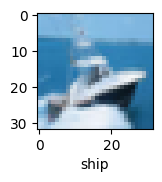

In [63]:
image(8)

Training data between 0 and 1

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="softmax")

])


c:\Users\HP\anaconda3\envs\mydlenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])

In [16]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.3412 - loss: 1.8905
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5587 - loss: 1.2491
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6248 - loss: 1.0783
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6608 - loss: 0.9753
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6882 - loss: 0.9028
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7074 - loss: 0.8470
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7239 - loss: 0.7996
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7378 - loss: 0.7594
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7484 - loss: 0.7290
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7608 - loss: 0.6925


In [17]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7100 - loss: 0.8621


[0.8642302751541138, 0.7080000042915344]

In [18]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [32]:
y_predf = [np.argmax(element) for element in y_pred]

In [35]:
y_predf= [int(x) for x in y_predf]

In [45]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
y_predf[:5]

[3, 8, 1, 8, 6]

Function to show predicted image no matter wrong or right

In [64]:
def p_m(m):
    n = int(y_predf[m])
    p = 0
    for i in y_train:
        p+=1
        if n == i:
            return p-1
            break
        else:
            continue

function for comparing test data with predicted data. not only the names but the images too

In [65]:
def pred_img(x):

    plt.figure(figsize = (6,3))

    plt.subplot(1,2,1)
    plt.title(f"Actual: {names[int(y_test[x])]}")
    plt.imshow(X_test[x], cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title(f"Predicted: {names[int(y_predf[x])]}")
    plt.imshow(X_train[p_m(x)], cmap='gray')
    plt.axis('off')

    plt.tight_layout()

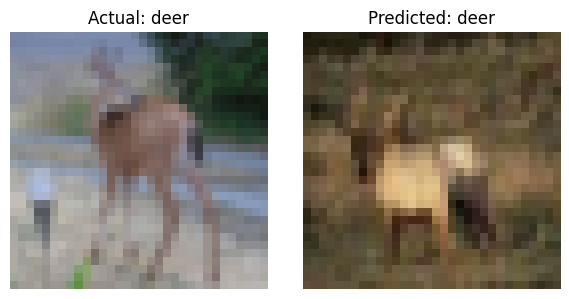

In [70]:
pred_img(100)